In [1]:
!pip install qiskit==0.46 qiskit-ibmq-provider pylatexenc qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of qiskit-aer to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [3]:
from qiskit import IBMQ, BasicAer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-3-cc5b9dc5c3df>:1: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import IBMQ, BasicAer


In [4]:
MY_API_TOKEN = 'eda22ec38f81a3f8bea973c9355c422d15824bb570d5044749f90c5a9d3f3ed7f5b15970fa374ef750355b4fe9402ec7f8f37cc7325920906f8c4f185e42f663'
IBMQ.save_account(MY_API_TOKEN)

IBMQ.load_account()

<ipython-input-4-e675380077ad>:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(MY_API_TOKEN)
<ipython-input-4-e675380077ad>:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(MY_API_TOKEN)


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
n = 7
backend = Aer.get_backend('qasm_simulator')
prob_of_ans = []

<ipython-input-5-e54ae9cf9cb3>:2: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend = Aer.get_backend('qasm_simulator')


In [9]:
target_value = '0101011'

In [ ]:
for x in range(15):
    database = QuantumRegister(n)
    oracle = QuantumRegister(1)
    auxiliary = QuantumRegister(n-1)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(database, oracle, auxiliary, cr)

    qc.h(database[:])
    qc.x(oracle[0])
    qc.h(oracle[0])

    for j in range(x):
        for k in range(n):
            if target_value[k] == '0':
                qc.x(database[k])
        qc.mct(database[:], oracle[0], auxiliary[:])
        for k in range(n):
            if target_value[k] == '0':
                qc.x(database[k])

        qc.h(database[:])
        qc.x(database[:])
        qc.h(database[n-1])
        qc.mct(database[:-1], database[n-1], auxiliary[:])
        qc.h(database[n-1])
        qc.x(database[:])
        qc.h(database[:])

    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(database, cr)
    qc = qc.reverse_bits()

    job = execute(qc, backend=backend, shots=1000)
    result = job.result()
    count = result.get_counts()

    answer = count.get(target_value, 0)
    prob_of_ans.append(answer)

<ipython-input-11-4cd526ccf4c5>:34: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, backend=backend, shots=1000)
<ipython-input-11-4cd526ccf4c5>:16: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(database[:], oracle[0], auxiliary[:])
<ipython-input-11-4cd526ccf4c5>:24: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(databa

Количество итераций с наибольшей вероятностью: 8


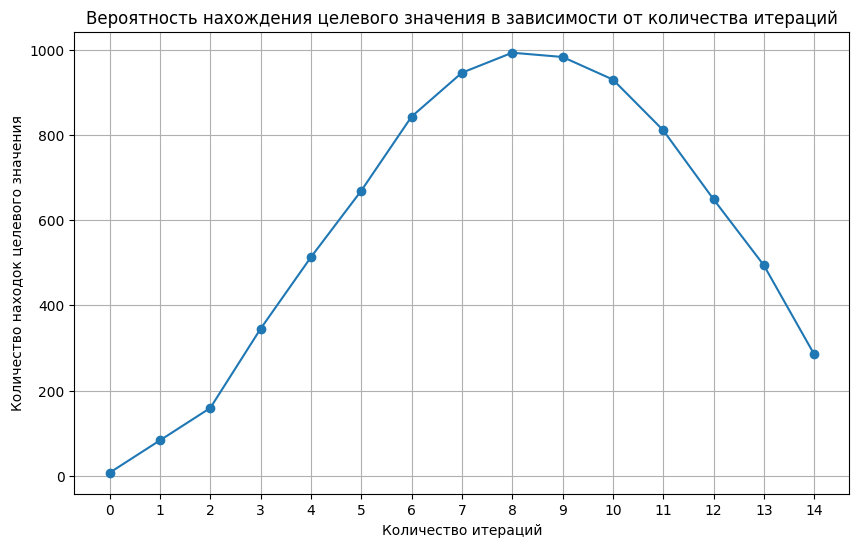

In [10]:
max_amplitude_iterations = np.argmax(prob_of_ans)
print(f'Количество итераций с наибольшей вероятностью: {max_amplitude_iterations}')

plt.figure(figsize=(10, 6))
plt.plot(range(15), prob_of_ans, marker='o')
plt.title('Вероятность нахождения целевого значения в зависимости от количества итераций')
plt.xlabel('Количество итераций')
plt.ylabel('Количество находок целевого значения')
plt.xticks(range(15))
plt.grid()
plt.show()